In [33]:
import cmocean.cm as cm
import h5py
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline

ModuleNotFoundError: No module named 'tables'

In [34]:
ds = xr.open_dataset('/data/sallen/results/MIDOSS/Lagrangian_DieselFuel_refined_15jan18-22jan18_Diesel.nc')
hdf5_File = '/data/sallen/results/MIDOSS/Lagrangian_DieselFuel_refined_15jan18-22jan18_Diesel.hdf5'
hdf = h5py.File(hdf5_File)
mesh = xr.open_dataset('~/MEOPAR/grid/mesh_mask201702.nc')

/home/sallen/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
ds.keys()

KeysView(<xarray.Dataset>
Dimensions:              (grid_x: 396, grid_x_latlon: 397, grid_y: 896, grid_y_latlon: 897, grid_z: 40, time: 191)
Coordinates:
  * time                 (time) datetime64[ns] 2018-01-15T00:30:00 ... 2018-01-22T22:30:00
  * grid_y               (grid_y) int16 0 1 2 3 4 5 ... 890 891 892 893 894 895
  * grid_x               (grid_x) int16 0 1 2 3 4 5 ... 390 391 392 393 394 395
  * grid_z               (grid_z) int16 0 1 2 3 4 5 6 7 ... 33 34 35 36 37 38 39
  * grid_y_latlon        (grid_y_latlon) float32 0.0 1.0 2.0 ... 895.0 896.0
  * grid_x_latlon        (grid_x_latlon) float32 0.0 1.0 2.0 ... 395.0 396.0
Data variables:
    OilConcentration_2D  (time, grid_y, grid_x) float64 ...
    Thickness_2D         (time, grid_y, grid_x) float64 ...
    Dissolution_3D       (time, grid_z, grid_y, grid_x) float64 ...
    OilConcentration_3D  (time, grid_z, grid_y, grid_x) float64 ...
    Latitude             (grid_y_latlon, grid_x_latlon) float64 ...
    Longitude       

## NetCDF Thickness:
disappears after it = 12

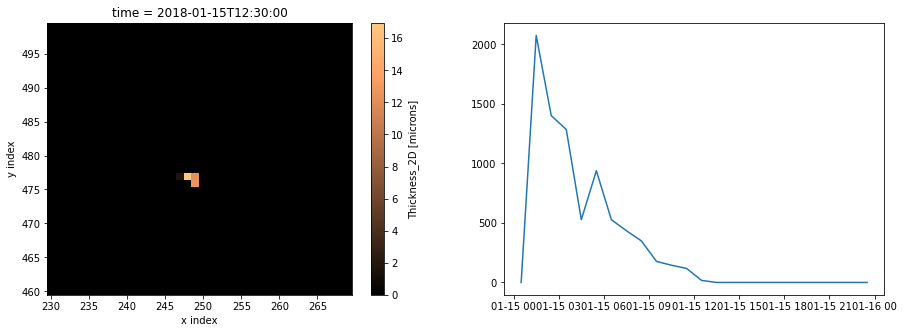

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
it = 12
ds.Thickness_2D[it, 460:500 , 230:270].plot(ax=axs[0], cmap='copper')
axs[1].plot(ds.time[0:24], ds.Thickness_2D[0:24].max(axis=1).max(axis=1));

## NetCDF 2D Concentration:
Very similar response, also disappears after it = 12

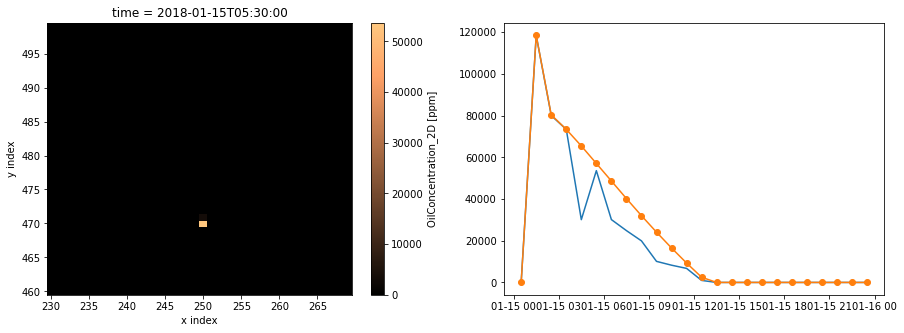

In [120]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
it = 5
ds.OilConcentration_2D[it, 460:500 , 230:270].plot(ax=axs[0], cmap='copper')
axs[1].plot(ds.time[0:24], ds.OilConcentration_2D[0:24].max(axis=1).max(axis=1));
axs[1].plot(ds.time[0:24], ds.OilConcentration_2D[0:24].sum(axis=1).sum(axis=1), 'o-');

# NetCDF 3D Oil Concentration

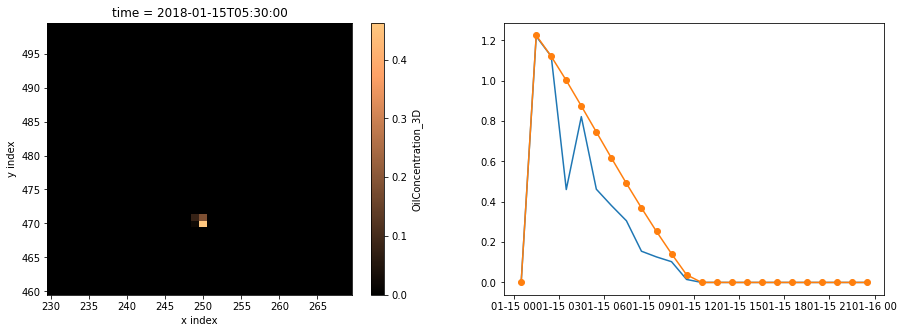

In [121]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
it = 5
ds.OilConcentration_3D[it, :, 460:500 , 230:270].sum(axis=0).plot(ax=axs[0], cmap='copper')
axs[1].plot(ds.time[0:24], ds.OilConcentration_3D[0:24].sum(axis=1).max(axis=1).max(axis=1));
axs[1].plot(ds.time[0:24], ds.OilConcentration_3D[0:24].sum(axis=1).sum(axis=1).sum(axis=1), 'o-');

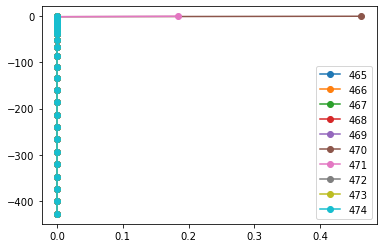

In [19]:
fig, ax = plt.subplots(1, 1)
for i in range(465, 475):
    ax.plot(ds.OilConcentration_3D[it, :, i, 250], -mesh.gdepw_1d[0, ::-1], 'o-', label=str(i));
ax.legend();

# HDF5 File Considering the Particles

In [196]:
hdf['Grid']['VerticalZ']['Vertical_00010']

<HDF5 dataset "Vertical_00010": shape (41, 396, 896), type "<f8">

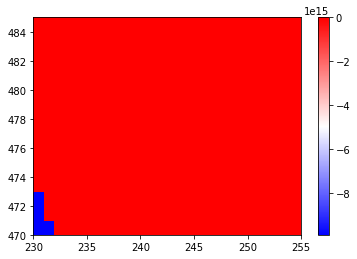

In [197]:
imin, imax = 470, 485
jmin, jmax = 230, 255
plt.pcolormesh(hdf['Grid']['VerticalZ']['Vertical_00001'][39].transpose(), cmap='bwr')
plt.plot([240, 241], [480, 478], 'rx');
plt.xlim((jmin,jmax))
plt.ylim((imin, imax));
plt.colorbar();

In [215]:
hdf['Time']['Time_00019'][:]

array([2.018e+03, 1.000e+00, 1.500e+01, 1.800e+01, 3.000e+01, 0.000e+00])

In [206]:
hdf['Results']['Number']['Number_00010']

<HDF5 dataset "Number_00010": shape (40, 396, 896), type "<f8">

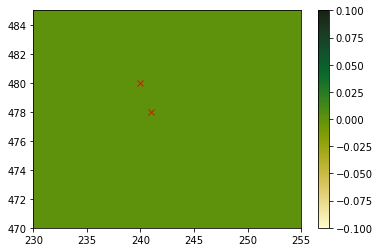

In [219]:
imin, imax = 470, 485
jmin, jmax = 230, 255
plt.pcolormesh(hdf['Results']['Number']['Number_00012'][38].transpose(), cmap=cm.speed)
plt.plot([240, 241], [480, 478], 'rx');
plt.xlim((jmin,jmax))
plt.ylim((imin, imax));
plt.colorbar();

In [222]:
hdf['Results']['Percentage Contaminated']['Percentage Contaminated_00012']

<HDF5 dataset "Percentage Contaminated_00012": shape (40, 396, 896), type "<f8">

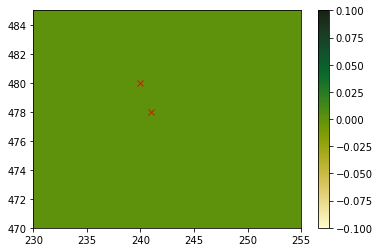

In [234]:
imin, imax = 470, 485
jmin, jmax = 230, 255
plt.pcolormesh(hdf['Results']['Percentage Contaminated']['Percentage Contaminated_00014'][39].transpose(), cmap=cm.speed)
plt.plot([240, 241], [480, 478], 'rx');
plt.xlim((jmin,jmax))
plt.ylim((imin, imax));
plt.colorbar();

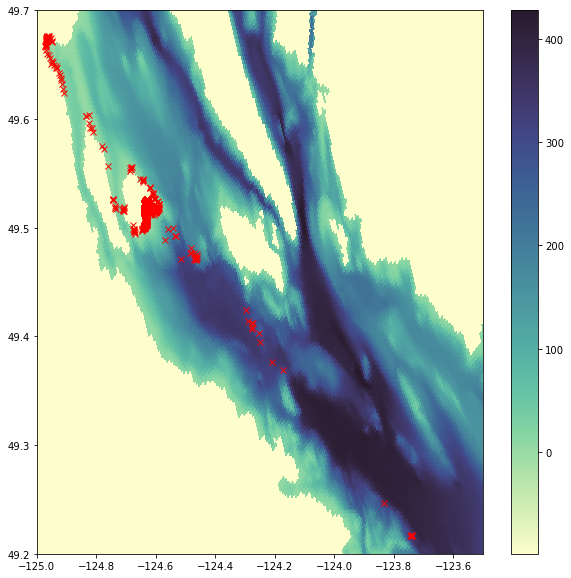

In [275]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
imin, imax = 470, 485
jmin, jmax = 230, 255
colour = ax.pcolormesh(hdf['Grid']['Longitude'][:], hdf['Grid']['Latitude'][:], hdf['Grid']['Bathymetry'][:], cmap=cm.deep)
fig.colorbar(colour)
for i in range (2000):
    if hdf['Results']['OilSpill']['Beached']['Beached_00190'][i] > 1:
#        print (i, hdf['Results']['OilSpill']['Longitude']['Longitude_00190'][i],
#               hdf['Results']['OilSpill']['Latitude']['Latitude_00190'][i])
        ax.plot(hdf['Results']['OilSpill']['Longitude']['Longitude_00190'][i],
               hdf['Results']['OilSpill']['Latitude']['Latitude_00190'][i], 'rx')
ax.set_xlim((-125, -123.5))
ax.set_ylim((49.2, 49.7));

In [279]:
diffy = (hdf['Results']['Group_1']['Data_1D']['Beached']['Beached_00010'][:] 
         - hdf['Results']['OilSpill']['Beached']['Beached_00010'][:])
diffy.max()

0.0

In [280]:
hdf['Results']['OilSpill']['Data_2D'].keys()

<KeysViewHDF5 ['Beaching Time', 'Beaching Volume', 'Oil Arrival Time', 'OilConcentration_2D', 'Thickness_2D']>

In [281]:
hdf['Results']['OilSpill']['Data_3D'].keys()

<KeysViewHDF5 ['Dissolution_3D', 'OilConcentration_3D']>

In [1]:
hdf['Results']['OilSpill']['Data_2D']['Beaching Volume']['Beaching Volume_00190'][:].min()

NameError: name 'hdf' is not defined

In [294]:
for i in range(9):
    vstring = f'Volume_0000{i+1}'
    print (i+1, hdf['Results']['OilSpill']['Volume'][vstring][:].max())
for i in range(10): 
    vstring = f'Volume_0001{i}'
    print (i+10, hdf['Results']['OilSpill']['Volume'][vstring][:].max())

1 0.5
2 0.3388962486867983
3 0.30940326990458444
4 0.2760264271438966
5 0.24077009278991635
6 0.20502465134058495
7 0.16947341880008682
8 0.1349113919046758
9 0.10150771711104642
10 0.06956093626710545
11 0.03920014376868598
12 0.010511513838270798
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0


In [301]:
summit =np.zeros((40, 396, 896))
for i in range(9):
    vstring = f'OilConcentration_3D_0000{i+1}'
    print (i+1, hdf['Results']['OilSpill']['Data_3D']['OilConcentration_3D'][vstring][:].max())
    summit = summit + hdf['Results']['OilSpill']['Data_3D']['OilConcentration_3D'][vstring][:]
for i in range(10): 
    vstring = f'OilConcentration_3D_0001{i}'
    print (i+10, hdf['Results']['OilSpill']['Data_3D']['OilConcentration_3D'][vstring][:].max())
    summit = summit + hdf['Results']['OilSpill']['Data_3D']['OilConcentration_3D'][vstring][:]

1 0.0
2 1.2202370738826924
3 1.1209224254450483
4 0.4606798038987959
5 0.8221027902264945
6 0.462202073604735
7 0.38150200164437587
8 0.30574157343870767
9 0.15475060209431615
10 0.12648853063135115
11 0.10291212786353822
12 0.014789439859982755
13 5.703546773305068e-05
14 5.696290185829289e-05
15 3.799986657897166e-05
16 1.900875768216331e-05
17 3.800658444217003e-05
18 1.9016207035365525e-05
19 1.902586568892974e-05


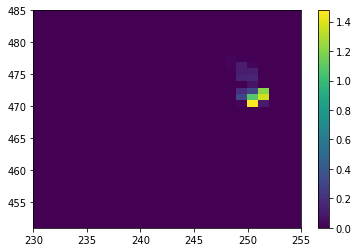

In [306]:
plt.pcolormesh(summit[39].transpose())
plt.colorbar()
imin, imax = 470, 485
jmin, jmax = 230, 255
plt.xlim((jmin, jmax));
plt.ylim((imin-19, imax));

In [22]:
OilSpill = hdf['Results']['OilSpill']
Xpos, Ypos, Zpos = OilSpill['X Pos'], OilSpill['Y Pos'], OilSpill['Z Pos']

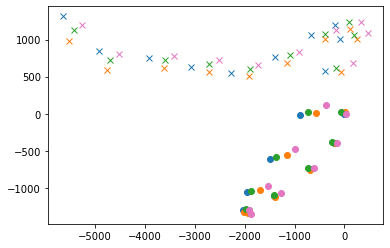

In [36]:
fig, ax = plt.subplots(1, 1)
for i in range(9):
    xstring = f'X Position_0000{i+1}'
    ystring = f'Y Position_0000{i+1}'
    ax.plot(Xpos[xstring][0] - Xpos[f'X Position_00001'][0], Ypos[ystring][0] - Ypos[f'Y Position_00001'][0], 'o', color='tab:blue')
    ax.plot(Xpos[xstring][10] - Xpos[f'X Position_00001'][0], Ypos[ystring][10] - Ypos[f'Y Position_00001'][0], 'o', color='tab:orange')
    ax.plot(Xpos[xstring][20] - Xpos[f'X Position_00001'][0], Ypos[ystring][20] - Ypos[f'Y Position_00001'][0], 'o', color='tab:green')
    ax.plot(Xpos[xstring][50] - Xpos[f'X Position_00001'][0], Ypos[ystring][50] - Ypos[f'Y Position_00001'][0], 'o', color='tab:pink')
for i in range(10): 
    xstring = f'X Position_0001{i}'
    ystring = f'Y Position_0001{i}'
    ax.plot(Xpos[xstring][0] - Xpos[f'X Position_00001'][0], Ypos[ystring][0] - Ypos[f'Y Position_00001'][0], 'x', color='tab:blue')
    ax.plot(Xpos[xstring][10] - Xpos[f'X Position_00001'][0], Ypos[ystring][10] - Ypos[f'Y Position_00001'][0], 'x', color='tab:orange')
    ax.plot(Xpos[xstring][20] - Xpos[f'X Position_00001'][0], Ypos[ystring][20] - Ypos[f'Y Position_00001'][0], 'x', color='tab:green')
    ax.plot(Xpos[xstring][50] - Xpos[f'X Position_00001'][0], Ypos[ystring][50] - Ypos[f'Y Position_00001'][0], 'x', color='tab:pink')


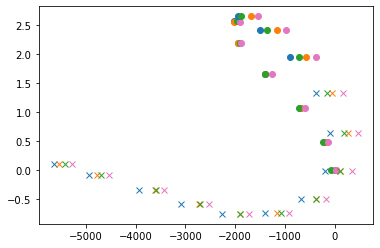

In [37]:
fig, ax = plt.subplots(1, 1)
for i in range(9):
    xstring = f'X Position_0000{i+1}'
    zstring = f'Z Position_0000{i+1}'
    ax.plot(Xpos[xstring][0] - Xpos[f'X Position_00001'][0], Zpos[zstring][0] - Zpos[f'Z Position_00001'][0], 'o', color='tab:blue')
    ax.plot(Xpos[xstring][10] - Xpos[f'X Position_00001'][0], Zpos[zstring][10] - Zpos[f'Z Position_00001'][0], 'o', color='tab:orange')
    ax.plot(Xpos[xstring][20] - Xpos[f'X Position_00001'][0], Zpos[zstring][20] - Zpos[f'Z Position_00001'][0], 'o', color='tab:green')
    ax.plot(Xpos[xstring][50] - Xpos[f'X Position_00001'][0], Zpos[zstring][50] - Zpos[f'Z Position_00001'][0], 'o', color='tab:pink')
for i in range(10):  
    xstring = f'X Position_0001{i}'
    zstring = f'Z Position_0001{i}'
    ax.plot(Xpos[xstring][0] - Xpos[f'X Position_00001'][0], Zpos[zstring][0] - Zpos[f'Z Position_00001'][0], 'x', color='tab:blue')
    ax.plot(Xpos[xstring][10] - Xpos[f'X Position_00001'][0], Zpos[zstring][10] - Zpos[f'Z Position_00001'][0], 'x', color='tab:orange')
    ax.plot(Xpos[xstring][20] - Xpos[f'X Position_00001'][0], Zpos[zstring][20] - Zpos[f'Z Position_00001'][0], 'x', color='tab:green')
    ax.plot(Xpos[xstring][50] - Xpos[f'X Position_00001'][0], Zpos[zstring][50] - Zpos[f'Z Position_00001'][0], 'x', color='tab:pink')


777.0 2000.0 2000.0


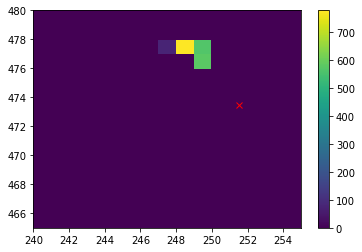

In [77]:
field = hdf['Results']['Number']['Number_00013']
plt.pcolormesh(field[-1].transpose());
plt.plot(251+0.5, 473+0.5, 'rx')
plt.colorbar();
plt.xlim(240, 255);
plt.ylim(465, 480);
print(field[:].max(axis=0).max(axis=0).max(axis=0), 
     field[:].sum(axis=0).sum(axis=0).sum(axis=0), 
     field[-1].sum(axis=0).sum(axis=0))

In [119]:
for i in range(9):
    nstring = f'Number_0000{i+1}'
    zstring = f'Z Position_0000{i+1}'
    print(i, Zpos[zstring][:].max(), hdf['Results']['Number'][nstring][:].sum(axis=0).sum(axis=0).sum(axis=0))
for i in range(10):  
    nstring = f'Number_0001{i}'
    zstring = f'Z Position_0001{i}'
    print(i+10, Zpos[zstring][:].max(), hdf['Results']['Number'][nstring][:].sum(axis=0).sum(axis=0).sum(axis=0))

0 -0.6273619532585144 2000.0
1 -0.14118482172489166 2000.0
2 0.43638429045677185 2000.0
3 1.0337759256362915 2000.0
4 1.9068846935976063 2000.0
5 1.9422030448913574 2000.0
6 2.031789541244507 2000.0
7 1.7981444597244263 2000.0
8 1.3185951709747314 2000.0
10 0.7056884765625 2000.0
11 0.008925036527216434 2000.0
12 -0.6392446160316467 2000.0
13 1.333360365757105 2000.0
14 1.1684111204625118 2000.0
15 1.7268118286157141 2000.0
16 1.2875613661033352 2000.0
17 1.4903081146212014 2000.0
18 0.8308760544195094 2000.0
19 0.8308760544195094 2000.0


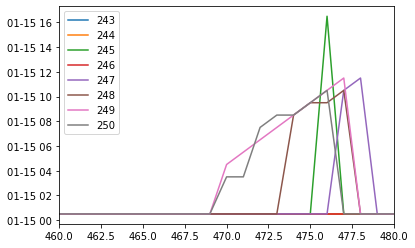

In [39]:
fig, ax = plt.subplots(1, 1)
for j in range(243, 251):
    plt.plot(ds.Oil_Arrival_Time[:, j], label=str(j));
ax.set_xlim(460, 480)
ax.legend();

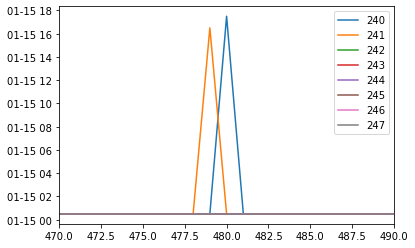

In [9]:
fig, ax = plt.subplots(1, 1)
for j in range(240, 248):
    plt.plot(ds.Beaching_Time[:, j], label=str(j));
ax.set_xlim(470, 490)
ax.legend();

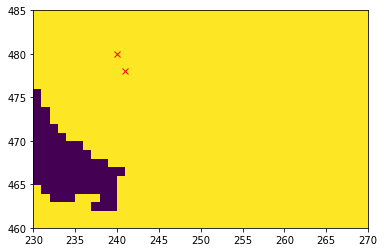

In [10]:
fig, ax = plt.subplots(1, 1)
ax.pcolormesh(mesh.tmask[0, 0])
ax.set_ylim(460, 485)
ax.set_xlim(230, 270)
ax.plot([240, 241], [480, 478], 'rx');

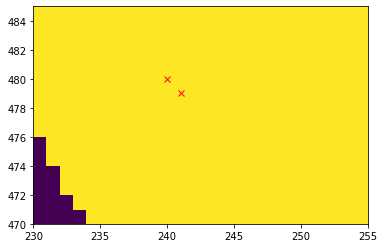

In [11]:
it = 17
fig, ax = plt.subplots(1, 1)
ax.pcolormesh(mesh.tmask[0, 0])
imin, imax = 470, 485
jmin, jmax = 230, 255
ax.set_ylim(imin, imax)
ax.set_xlim(jmin, jmax)
for i in range(imin, imax):
    for j in range(jmin, jmax):
        if ds.OilConcentration_2D[it, i, j] != 0:
#            print(i, j, ds.time[it].values, ds.OilConcentration_2D[it, i, j].values)
            plt.plot(j, i, 'bo')
        if ds.Beaching_Time[i, j] > ds.time[0].values and ds.Beaching_Time[i, j] <= ds.time[it].values:
#            print(i, j, ds.time[it].values, ds.Beaching_Time[i, j].values)
            plt.plot(j, i, 'rx')

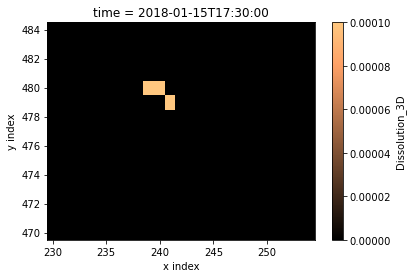

In [12]:
ds.Dissolution_3D[17, :, imin:imax, jmin:jmax].sum(axis=0).plot(cmap='copper')

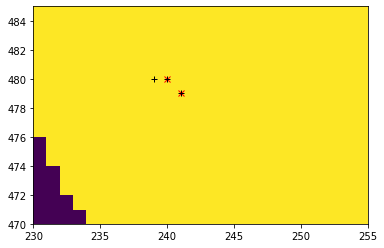

In [13]:
it = 17
fig, ax = plt.subplots(1, 1)
ax.pcolormesh(mesh.tmask[0, 0])
imin, imax = 470, 485
jmin, jmax = 230, 255
ax.set_ylim(imin, imax)
ax.set_xlim(jmin, jmax)
for i in range(imin, imax):
    for j in range(jmin, jmax):
        if ds.OilConcentration_2D[it, i, j] != 0:
#            print(i, j, ds.time[it].values, ds.OilConcentration_2D[it, i, j].values)
            plt.plot(j, i, 'bo')
        if ds.Beaching_Time[i, j] > ds.time[0].values and ds.Beaching_Time[i, j] <= ds.time[it].values:
#            print(i, j, ds.time[it].values, ds.Beaching_Time[i, j].values)
            plt.plot(j, i, 'rx')
        if ds.Dissolution_3D[it, :, i, j].sum() != 0:
            plt.plot(j, i, 'k+')

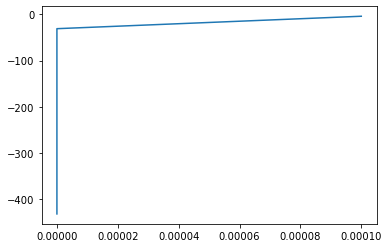

In [14]:
plt.plot(ds.Dissolution_3D[it, :, 480, 240], mesh.gdepw_1d[0] - 432)

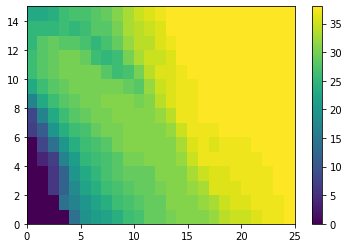

In [15]:
plt.pcolormesh(mesh.mbathy[0, imin:imax, jmin:jmax])
plt.colorbar();

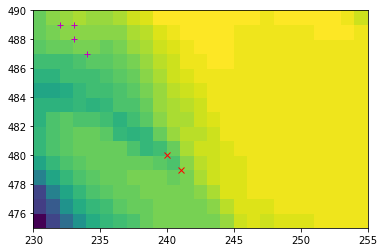

In [16]:
it = 20
fig, ax = plt.subplots(1, 1)
ax.pcolormesh(mesh.mbathy[0])
imin, imax = 475, 490
jmin, jmax = 230, 255
ax.set_ylim(imin, imax)
ax.set_xlim(jmin, jmax)
for i in range(imin, imax):
    for j in range(jmin, jmax):
        if ds.OilConcentration_2D[it, i, j] != 0:
#            print(i, j, ds.time[it].values, ds.OilConcentration_2D[it, i, j].values)
            plt.plot(j, i, 'bo')
        if ds.Beaching_Time[i, j] > ds.time[0].values and ds.Beaching_Time[i, j] <= ds.time[it].values:
#            print(i, j, ds.time[it].values, ds.Beaching_Time[i, j].values)
            plt.plot(j, i, 'rx')
        if ds.Dissolution_3D[it, :, i, j].sum() != 0:
            plt.plot(j, i, 'm+')

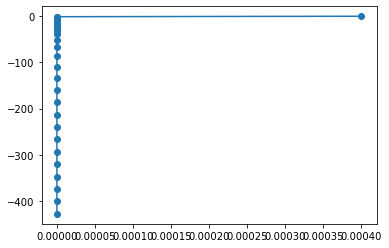

In [17]:
plt.plot(ds.Dissolution_3D[20, :, :, :].sum(axis=1).sum(axis=1), -mesh.gdepw_1d[0, ::-1], 'o-');

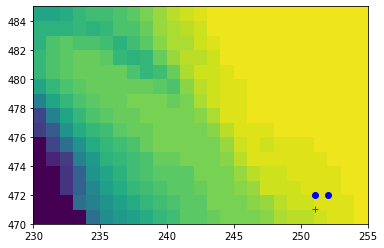

In [19]:
it = 2
fig, ax = plt.subplots(1, 1)
ax.pcolormesh(mesh.mbathy[0])
imin, imax = 470, 485
jmin, jmax = 230, 255
ax.set_ylim(imin, imax)
ax.set_xlim(jmin, jmax)
for i in range(imin, imax):
    for j in range(jmin, jmax):
        if ds.OilConcentration_2D[it, i, j] != 0:
#            print(i, j, ds.time[it].values, ds.OilConcentration_2D[it, i, j].values)
            plt.plot(j, i, 'bo')
        if ds.Beaching_Time[i, j] > ds.time[0].values and ds.Beaching_Time[i, j] <= ds.time[it].values:
#            print(i, j, ds.time[it].values, ds.Beaching_Time[i, j].values)
            plt.plot(j, i, 'rx')
        if ds.OilConcentration_3D[it, :, i, j].sum() != 0:
            plt.plot(j, i, 'm+')

In [55]:
hdf['Results']['OilSpill']['Data_3D']['Dissolution_3D'].keys()

<KeysViewHDF5 ['Dissolution_3D_00001', 'Dissolution_3D_00002', 'Dissolution_3D_00003', 'Dissolution_3D_00004', 'Dissolution_3D_00005', 'Dissolution_3D_00006', 'Dissolution_3D_00007', 'Dissolution_3D_00008', 'Dissolution_3D_00009', 'Dissolution_3D_00010', 'Dissolution_3D_00011', 'Dissolution_3D_00012', 'Dissolution_3D_00013', 'Dissolution_3D_00014', 'Dissolution_3D_00015', 'Dissolution_3D_00016', 'Dissolution_3D_00017', 'Dissolution_3D_00018', 'Dissolution_3D_00019', 'Dissolution_3D_00020', 'Dissolution_3D_00021', 'Dissolution_3D_00022', 'Dissolution_3D_00023', 'Dissolution_3D_00024', 'Dissolution_3D_00025', 'Dissolution_3D_00026', 'Dissolution_3D_00027', 'Dissolution_3D_00028', 'Dissolution_3D_00029', 'Dissolution_3D_00030', 'Dissolution_3D_00031', 'Dissolution_3D_00032', 'Dissolution_3D_00033', 'Dissolution_3D_00034', 'Dissolution_3D_00035', 'Dissolution_3D_00036', 'Dissolution_3D_00037', 'Dissolution_3D_00038', 'Dissolution_3D_00039', 'Dissolution_3D_00040', 'Dissolution_3D_00041', '

In [58]:
field = hdf['Results']['OilSpill']['Data_3D']['Dissolution_3D']['Dissolution_3D_00031']
for item in field.attrs.keys():
    print (item + ":", field.attrs[item])
print (field.attrs["Units"].decode())

Maximum: -9900000000000000.0
Minimum: -9900000000000000.0
Units: b'Kg/m3'
Kg/m3


In [61]:
field = hdf['Results']['OilSpill']['Data_2D']['Beaching Volume']['Beaching Volume_00031']
for item in field.attrs.keys():
    print (item + ":", field.attrs[item])
print (field.attrs["Units"].decode())

Maximum: -9900000000000000.0
Minimum: -9900000000000000.0
Units: b'-'
-


In [31]:
print (hdf5_file)
for group in hdf5_file.root.Results.OilSpill.Data_2D:
    
    print (group)

/data/sallen/results/MIDOSS/Lagrangian_DieselFuel_refined_15jan18-22jan18_Diesel.hdf5


AttributeError: 'str' object has no attribute 'Results'